## Observations and Insights 

In [219]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study = pd.merge(mouse_metadata, study_results, how = 'left', on='Mouse ID' )

# Display the data table for preview
study.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [7]:
# Checking the number of mice.
mice_count = len(study['Mouse ID'].unique())
mice_count

249

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = study[study.duplicated(['Mouse ID', 'Timepoint'])]
dup_mice['Mouse ID'].unique()


array(['g989'], dtype=object)

In [51]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice = study[study.duplicated(['Mouse ID', 'Timepoint'], keep='first')]
dup_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [80]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study = study[study['Mouse ID'].isin(study) == False]
study

# clean_study = study.copy
# clean_study.drop_duplicates(subset = ['Mouse ID'], keep = 'first', inplace=True)
# clean_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [71]:
# Checking the number of mice in the clean DataFrame.
unique_mice = len(study['Mouse ID'].unique())
unique_mice

249

## Summary Statistics

In [100]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
stats_sum = study.set_index('Drug Regimen').groupby('Drug Regimen')
# print(vars(stats_sum))
#pprint(stats_sum)
mean = stats_sum['Tumor Volume (mm3)'].mean()
#mean
median = stats_sum['Tumor Volume (mm3)'].median()
variance = stats_sum['Tumor Volume (mm3)'].var()
stddev = stats_sum['Tumor Volume (mm3)'].std()
sem = stats_sum['Tumor Volume (mm3)'].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
tumor_stats = pd.DataFrame({
    'Mean Tumor Volume':mean,
     'Median Tumor Volume':median,
     'Variance in Tumor Volume':variance,
     'Std dev of Tumor Volume':stddev,
     'Std err of Tumore Volume':sem
})  #,index=[0]
tumor_stats

,Mean Tumor Volume,Median Tumor Volume,Variance in Tumor Volume,Std dev of Tumor Volume,Std err of Tumore Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [109]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
summary_data = stats_sum.agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
summary_data


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

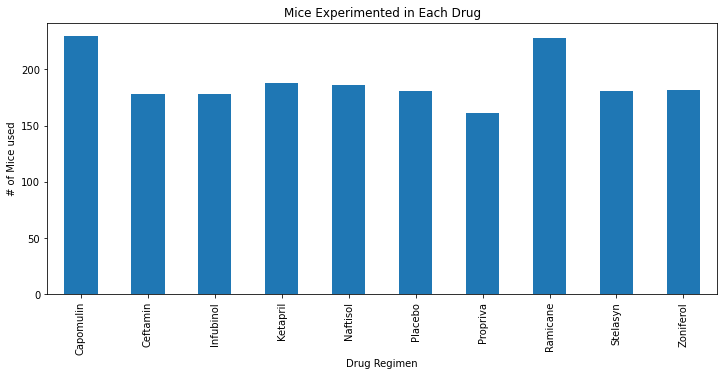

<Figure size 432x288 with 0 Axes>

In [119]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
dataplot = study.groupby(['Drug Regimen']).count()['Mouse ID']
dataplot.plot(kind='bar', figsize = (12,5))
# set chart title and labels:
plt.title('Mice Experimented in Each Drug')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Mice used')
plt.show()
plt.tight_layout()

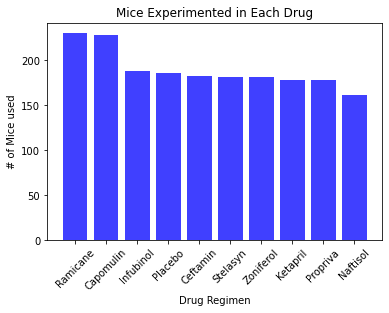

In [120]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

mice_count = study['Drug Regimen'].value_counts()
mice_count
drug_count = study['Drug Regimen'].unique()
drug_count

x_axis = np.arange(0,len(drug_count))
tick_loc = []
for x in x_axis:
    tick_loc.append(x)
plt.title('Mice Experimented in Each Drug')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Mice used')
plt.xticks(tick_loc, drug_count, rotation = 45)
plt.bar(x_axis, mice_count,color='blue',alpha = 0.75)
plt.show()

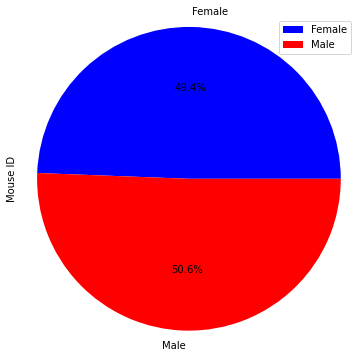

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [135]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender = study.groupby(['Sex']).count()['Mouse ID']
colors = ['blue','red']
mice_gender.plot(kind='pie', figsize = (6,6),colors=colors, autopct='%1.1f%%' )
plt.axis('equal')
plt.legend(['Female','Male'])
# plt.settitle('Mice Distrubution by Gender')
plt.show()
plt.tight_layout

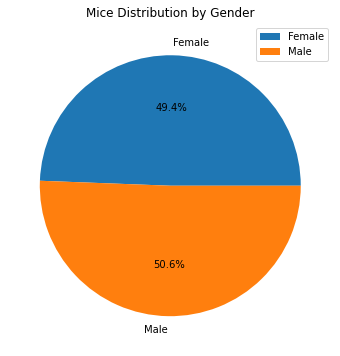

In [144]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mice_gender, labels = mice_gender.index.values, autopct='%1.1f%%')

plt.title('Mice Distribution by Gender')
plt.legend(['Female','Male'])
plt.rcParams['figure.figsize']=[8,8]
plt.show()


## Quartiles, Outliers and Boxplots

In [150]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
sort_data = study.sort_values(by='Timepoint', ascending=False)
sort_data = sort_data.drop_duplicates(subset=['Mouse ID'])
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
sort_data = sort_data.loc[(sort_data['Drug Regimen'].isin(drugs))]
sort_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
337,j119,Capomulin,Female,7,23,45,38.125164,1
272,d251,Ramicane,Female,8,19,45,37.311236,2
282,l897,Capomulin,Male,17,19,45,38.846876,1
299,b742,Capomulin,Male,7,21,45,38.939633,0
1379,p438,Ceftamin,Female,11,26,45,61.433892,1
...,...,...,...,...,...,...,...,...
1314,o813,Infubinol,Male,24,28,5,45.699331,0
1743,x226,Ceftamin,Male,23,28,0,45.000000,0
594,b447,Ceftamin,Male,2,30,0,45.000000,0
1551,t573,Ceftamin,Female,15,27,0,45.000000,0


In [178]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
drugs_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = study.loc[study['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    drugs_vol_list.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_b = lowerq - (1.5*iqr)
    upper_b = upperq + (1.5*iqr)
    outliners = tumor_vol.loc[(tumor_vol < lower_b) | (tumor_vol > upper_b)]
    print(f"{drug} is potential outliners: {outliners}")

Capomulin is potential outliners: 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane is potential outliners: 9    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol is potential outliners: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin is potential outliners: Series([], Name: Tumor Volume (mm3), dtype: float64)


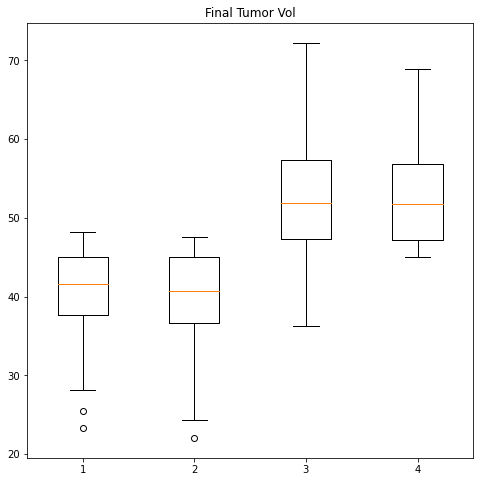

In [196]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig,ax = plt.subplots()
ax.set_title("Final Tumor Vol")
# ax.xaxis.set(ticks=len(drugs),
#              tickslabels=drugs[])
ax.boxplot(drugs_vol_list)
plt.show()

## Line and Scatter Plots

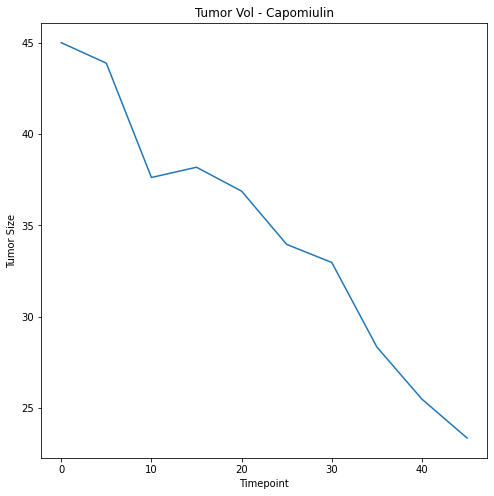

In [210]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mice_treated_capomulin = study.loc[study['Drug Regimen']=='Capomulin']
mice_treated_capomulin
s185 = mice_treated_capomulin.loc[mice_treated_capomulin['Mouse ID'] == 's185']
s185
plt.plot(s185['Timepoint'],s185['Tumor Volume (mm3)'])
plt.title('Tumor Vol - Capomiulin')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Size')
plt.show()


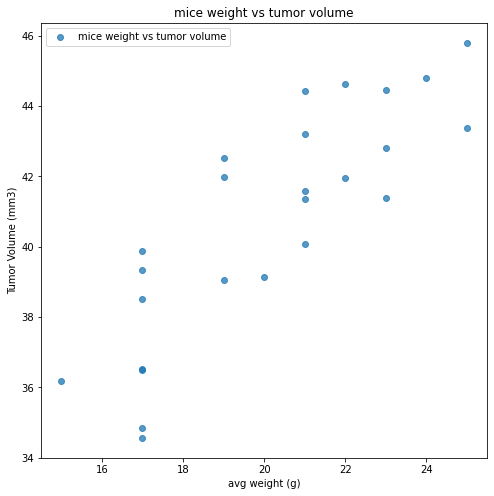

In [215]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_tum_vol = mice_treated_capomulin.groupby('Mouse ID').mean()
avg_tum_vol
x_axis = avg_tum_vol['Weight (g)']
y_axis = avg_tum_vol['Tumor Volume (mm3)']
plt.title('mice weight vs tumor volume')
plt.xlabel('avg weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.scatter(x_axis, y_axis, alpha = 0.75, label='mice weight vs tumor volume')
plt.legend()
plt.show()

## Correlation and Regression

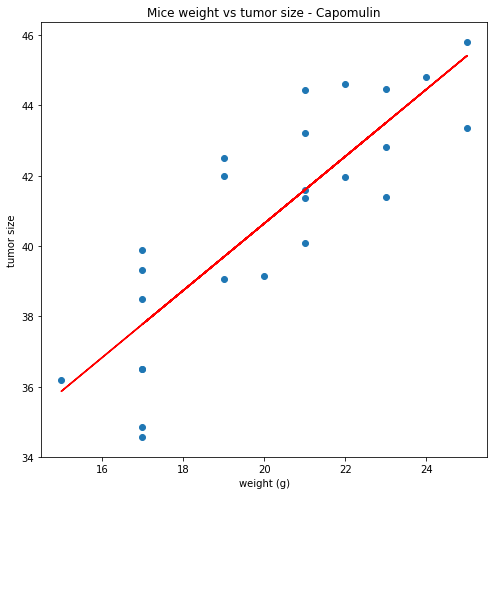

In [228]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regression_values = x_axis * slope + intercept
linear_equation = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept, 2))

plt.title('Mice weight vs tumor size - Capomulin')
plt.xlabel('weight (g)')
plt.ylabel('tumor size')
plt.annotate(linear_equation, (20, 30), fontsize = 15, color = 'black')
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regression_values, color='red')
plt.show()